# **Project 1 - Predictive Analytics - Car Price Prediction**

## **Problem Statement**

Perusahaan otomotif China, Geely Auto, bermaksud untuk memasuki pasar Amerika Serikat dengan mendirikan pabrik manufaktur mereka di sana dan memproduksi mobil secara lokal untuk bersaing dengan pesaing mereka di Amerika Serikat dan Eropa.

Mereka telah mengontrak sebuah perusahaan konsultan otomotif untuk memahami faktor-faktor yang memengaruhi penetapan harga mobil. Secara khusus, mereka ingin memahami faktor-faktor yang mempengaruhi penetapan harga mobil di pasar Amerika, karena faktor-faktor tersebut mungkin sangat berbeda dari pasar China. Perusahaan ingin mengetahui:

- Variabel-variabel apa yang signifikan dalam memprediksi harga sebuah mobil.
- Seberapa baik variabel-variabel tersebut menjelaskan harga sebuah mobil.

Berdasarkan berbagai survei pasar, perusahaan konsultan telah mengumpulkan kumpulan data besar dari berbagai jenis mobil di pasar Amerika

## **Import Library**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

## **Data Loading**

In [47]:
# load the datasset and load in dataframe
df = pd.read_csv("/content/CarPrice_Assignment.csv")

In [48]:
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## **EDA**

### Deskripsi Variabel

In [49]:
# Menampilkan informasi umum tentang dataset, termasuk tipe data dan jumlah entri
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [50]:
# Menampilkan dimensi dataset (jumlah baris dan kolom)
df.shape

(205, 26)

In [51]:
# Menampilkan deskripsi statistik ringkas dari variabel numerik
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [52]:
# Menampilkan daftar nama kolom dalam dataset
print(list(df))

['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


### Missing Values

In [53]:
# Menghitung jumlah nilai yang hilang (missing values) untuk setiap kolom dalam dataset
nan_count = df.isna().sum()

print(nan_count)

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [54]:
# Menghapus kolom 'car_ID' karena tidak diperlukan
df=df.drop(['car_ID'],axis=1)

### Univariate Analysis

In [55]:
# Menampilkan deskripsi statistik dari kolom 'symboling'
df['symboling'].describe()

count    205.000000
mean       0.834146
std        1.245307
min       -2.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: symboling, dtype: float64

In [56]:
# Menampilkan deskripsi statistik dari kolom 'wheelbase'
df['wheelbase'].describe()

count    205.000000
mean      98.756585
std        6.021776
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheelbase, dtype: float64

In [57]:
# Menampilkan deskripsi statistik dari kolom 'fueltype'
df['fueltype'].describe()

count     205
unique      2
top       gas
freq      185
Name: fueltype, dtype: object

In [58]:
# Menampilkan deskripsi statistik dari kolom 'carbody'
df['carbody'].describe()

count       205
unique        5
top       sedan
freq         96
Name: carbody, dtype: object

In [59]:
# Menghitung frekuensi masing-masing nilai dalam kolom 'CarName'
df['CarName'].value_counts(sort=False)

alfa-romero giulia          1
alfa-romero stelvio         1
alfa-romero Quadrifoglio    1
audi 100 ls                 1
audi 100ls                  2
                           ..
volvo 244dl                 2
volvo 245                   1
volvo 264gl                 2
volvo diesel                1
volvo 246                   1
Name: CarName, Length: 147, dtype: int64

In [60]:
# Menampilkan deskripsi statistik dari kolom 'CarName'
df['CarName'].describe()

count               205
unique              147
top       toyota corona
freq                  6
Name: CarName, dtype: object

In [61]:
# Mengambil hanya nama merek mobil dari kolom 'CarName'
df['CarName'] = df['CarName'].str.split(' ').str[0]

In [62]:
# Menghitung frekuensi masing-masing nilai dalam kolom 'CarName'
df['CarName'].value_counts(sort=False)

alfa-romero     3
audi            7
bmw             8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
maxda           2
mazda          15
buick           8
mercury         1
mitsubishi     13
Nissan          1
nissan         17
peugeot        11
plymouth        7
porsche         4
porcshce        1
renault         2
saab            6
subaru         12
toyota         31
toyouta         1
vokswagen       1
volkswagen      9
vw              2
volvo          11
Name: CarName, dtype: int64

In [63]:
# Mengganti beberapa nama merek mobil yang salah eja
df['CarName'] = df['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota',
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [64]:
# Mengubah tipe data kolom 'symboling' menjadi string
df['symboling']=df['symboling'].astype('str')

In [66]:
# Kolom Numerik dan Kategorikal
numerical_columns=df.select_dtypes(exclude=['object']).columns
categorical_columns=df.select_dtypes(include=['object']).columns

In [67]:
# Correlation Matrix in numeric variable
Corr_mat=df[numerical_columns].corr()

### Multivariate Analysis

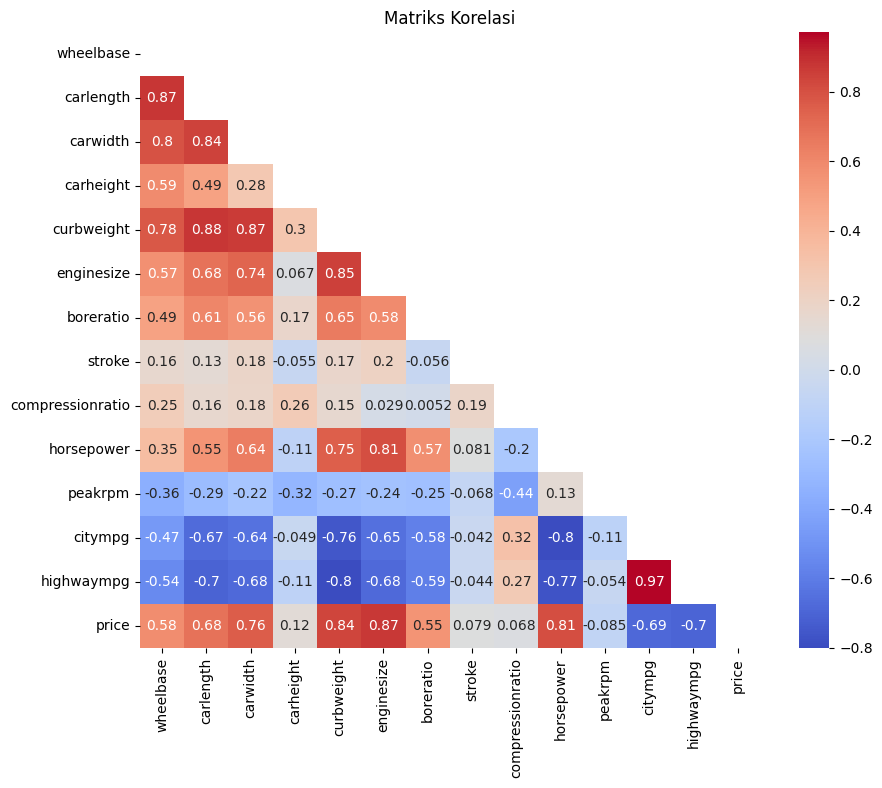

In [68]:
# Visualisasi matriks korelasi menggunakan Seaborn heatmap
plt.figure(figsize=(10, 8))
mask=np.triu(np.ones_like(Corr_mat))
sns.heatmap(Corr_mat, annot=True, cmap='coolwarm',mask=mask)
plt.title('Matriks Korelasi')
plt.show()

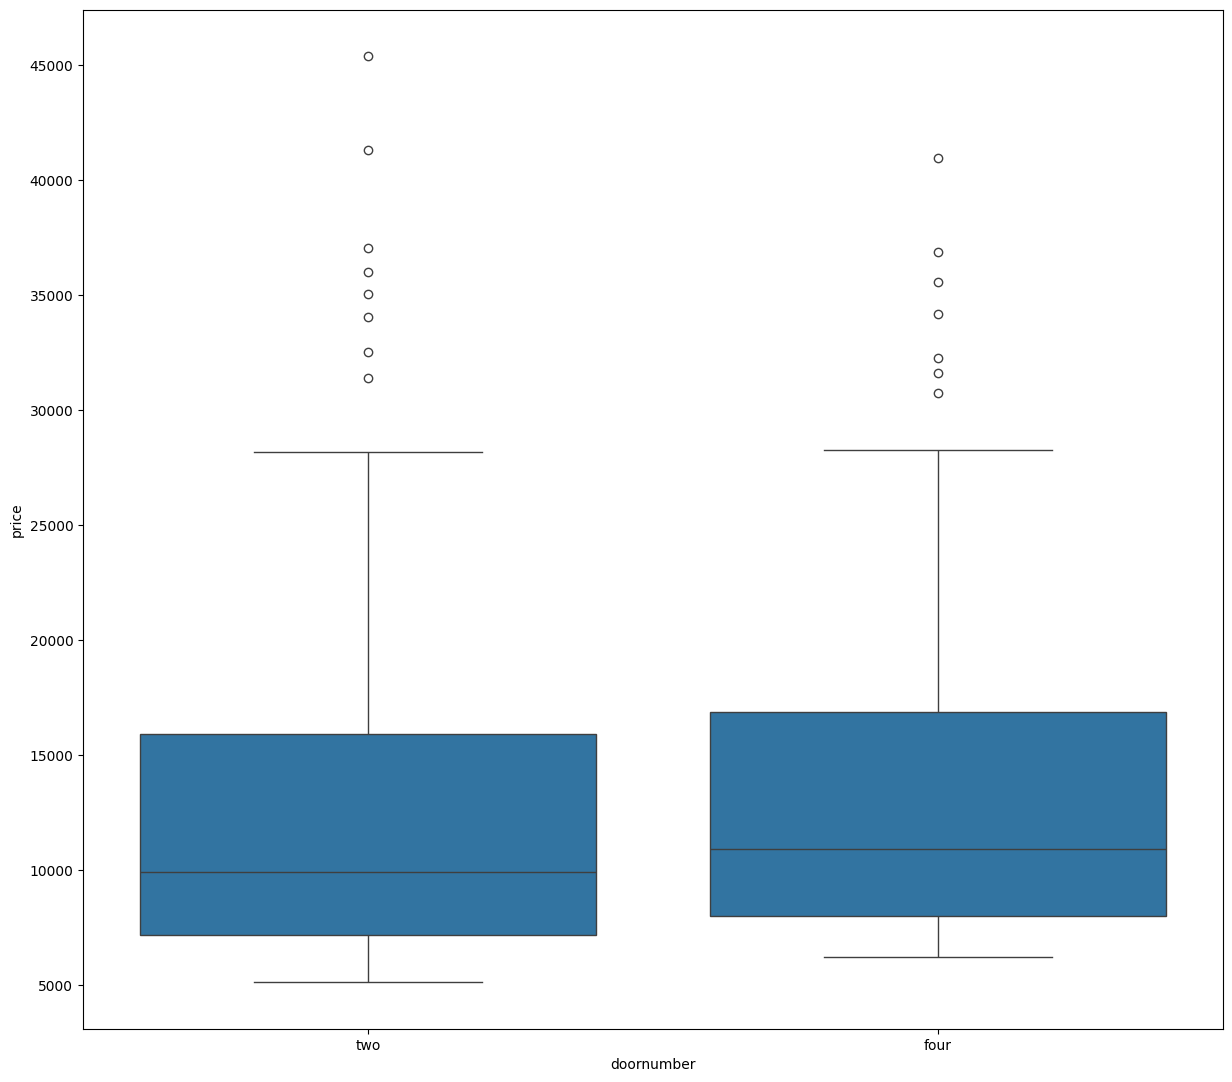

In [69]:
# Boxplot dari semua variabel kategorikal
plt.figure(figsize=(50, 45))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
# plt.subplot(3,3,2)
# sns.boxplot(x = 'fueltype', y = 'price', data = df)
# plt.subplot(3,3,3)
# sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.show()

In [70]:
# Menentukan kolom-kolom numerik kecuali 'price' dan 'car_ID'
numerical_columns_without_price_carID = [col for col in numerical_columns if col not in ['price', 'car_ID']]

# Memilih fitur-fitur yang akan digunakan sebagai variabel independen (X) dan variabel dependen (y)
X = df[['carlength','carwidth','curbweight','carheight','highwaympg']]
y=df['price']

Dalam membuat model tersebut, hanya beberapa variabel yang dipilih sebagai fitur untuk digunakan dalam pelatihan model. Variabel yang digunakan adalah:

- carlength: Panjang mobil.
- carwidth: Lebar mobil.
- curbweight: Berat mobil.
- carheight: Tinggi mobil.
- highwaympg: Konsumsi bahan bakar di jalan raya dalam satuan miles per gallon.

Jadi, terdapat lima variabel yang dipilih sebagai fitur untuk membuat model prediksi harga mobil. Variabel ini dipilih karena diduga memiliki pengaruh signifikan terhadap harga mobil dan relevan untuk digunakan dalam membuat prediksi. Variabel lain yang mungkin juga memiliki pengaruh terhadap harga mobil, seperti merek mobil atau jenis mesin, tidak dimasukkan ke dalam model ini.

In [28]:
X

,carlength,carwidth,curbweight,carheight,highwaympg
0,168.8,64.1,2548,48.8,27
1,168.8,64.1,2548,48.8,27
2,171.2,65.5,2823,52.4,26
3,176.6,66.2,2337,54.3,30
4,176.6,66.4,2824,54.3,22
...,...,...,...,...,...
200,188.8,68.9,2952,55.5,28
201,188.8,68.8,3049,55.5,25
202,188.8,68.9,3012,55.5,23
203,188.8,68.9,3217,55.5,27


## **Data Preparataion**

In [71]:
# Penskalaan fitur menggunakan StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [72]:
X = scaler.fit_transform(X)  # Penskalaan fitur independen
y = scaler.fit_transform(y.values.reshape(-1,1))  # Penskalaan fitur dependen

In [73]:
# Pembagian dataset menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0,shuffle=True)

In [74]:
# Mendapatkan jumlah fitur pada variabel dependen
y_train.shape[1]

1

## **Train Model : Random Forest **

In [76]:
# Impor modul yang diperlukan dari TensorFlow dan Keras
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras import regularizers
from keras.layers import BatchNormalization

In [78]:
# Inisialisasi model Sequential
model = Sequential()

In [79]:
# Menambahkan layer-layer Dense ke dalam model
model.add(Dense(10, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

In [80]:
# Menampilkan ringkasan arsitektur model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                60        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 181 (724.00 Byte)
Trainable params: 181 (724.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
# Kompilasi model dengan pengoptimal Adam dan fungsi loss mean squared error
from tensorflow.keras.optimizers import SGD,Adam
model.compile(optimizer="Adam",loss='mean_squared_error')

In [82]:
# Melatih model dengan data latih
history = model.fit(X_train,y_train,batch_size=10,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
15/15 [==============================] - 2s 25ms/step - loss: 2.1658 - val_loss: 1.8942
Epoch 2/100
15/15 [==============================] - 0s 11ms/step - loss: 1.8112 - val_loss: 1.6304
Epoch 3/100
15/15 [==============================] - 0s 10ms/step - loss: 1.5887 - val_loss: 1.3869
Epoch 4/100
15/15 [==============================] - 0s 9ms/step - loss: 1.3949 - val_loss: 1.1901
Epoch 5/100
15/15 [==============================] - 0s 9ms/step - loss: 1.2348 - val_loss: 1.0495
Epoch 6/100
15/15 [==============================] - 0s 10ms/step - loss: 1.1050 - val_loss: 0.9438
Epoch 7/100
15/15 [==============================] - 0s 9ms/step - loss: 1.0121 - val_loss: 0.8400
Epoch 8/100
15/15 [==============================] - 0s 9ms/step - loss: 0.9169 - val_loss: 0.7592
Epoch 9/100
15/15 [==============================] - 0s 12ms/step - loss: 0.8456 - val_loss: 0.6687
Epoch 10/100
15/15 [==============================] - 0s 10ms/step - loss: 0.7742 - val_loss: 0.5976
Epo

## **Evaluasi Model**

In [83]:
# Memprediksi harga mobil menggunakan model yang sudah dilatih
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 126ms/step


In [84]:
# Menghitung koefisien determinasi (R-squared) sebagai metrik evaluasi
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6525200715938025

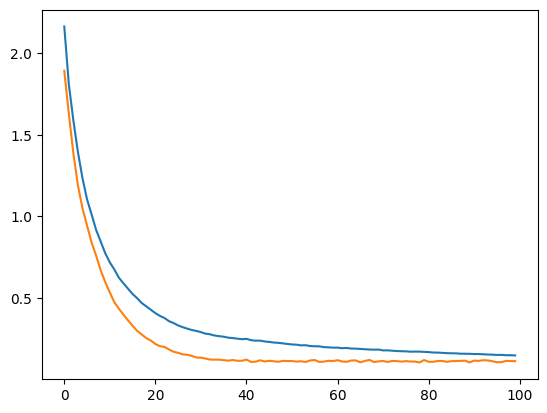

In [85]:
# Plot loss selama pelatihan
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

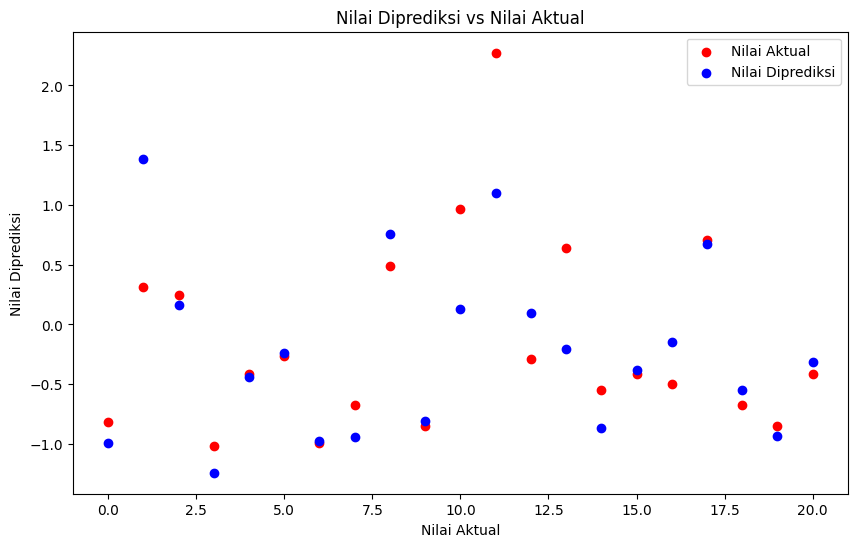

In [86]:
# Plot nilai aktual dan nilai yang diprediksi
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Nilai Aktual')
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Nilai Diprediksi')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Diprediksi')
plt.title('Nilai Diprediksi vs Nilai Aktual')
plt.legend()
plt.show()

### Pertanyaan 1: Variabel-variabel apa yang signifikan dalam memprediksi harga sebuah mobil?

- carlength (Panjang Mobil):
Variabel ini memiliki rentang nilai yang bervariasi cukup signifikan dari 141.1 hingga 208.1 dengan standar deviasi sekitar 12.34, menunjukkan variasi yang cukup besar dalam panjang mobil. Hal ini menandakan bahwa panjang mobil dapat menjadi faktor yang signifikan dalam menentukan harga mobil, karena ada variasi yang cukup besar antara mobil-mobil yang lebih pendek dan lebih panjang.
- carwidth (Lebar Mobil):
Variabel ini juga menunjukkan variasi yang cukup besar dari 60.3 hingga 72.3 dengan standar deviasi sekitar 2.15. Ini menunjukkan bahwa lebar mobil juga bisa menjadi faktor yang signifikan dalam menentukan harga mobil, karena ada variasi yang cukup besar antara mobil-mobil yang lebih sempit dan lebih lebar.
- curbweight (Berat Kosong Mobil):
Variabel ini memiliki rentang nilai yang cukup besar dari 1488 hingga 4066 dengan standar deviasi sekitar 520.68, menunjukkan variasi yang signifikan dalam berat kosong mobil. Hal ini menandakan bahwa berat kosong mobil dapat menjadi faktor penting dalam menentukan harga mobil, karena ada variasi yang cukup besar antara mobil-mobil yang lebih ringan dan lebih berat.
- carheight (Tinggi Mobil):
Meskipun tinggi mobil tidak menunjukkan variasi yang terlalu besar seperti variabel lainnya, tetapi masih ada variasi yang signifikan dari 47.8 hingga 59.8 dengan standar deviasi sekitar 2.44. Ini menandakan bahwa tinggi mobil juga dapat mempengaruhi harga mobil dalam skala yang lebih kecil, terutama jika ada variasi yang signifikan antara mobil-mobil dengan tinggi yang lebih rendah dan lebih tinggi.
- highwaympg (Konsumsi Bahan Bakar di Jalan Raya):
Variabel ini memiliki rentang nilai yang cukup besar dari 16 hingga 54 dengan standar deviasi sekitar 6.89, menunjukkan variasi yang cukup besar dalam konsumsi bahan bakar di jalan raya. Hal ini menandakan bahwa konsumsi bahan bakar di jalan raya dapat menjadi faktor penting dalam menentukan harga mobil, karena ada variasi yang cukup besar antara mobil-mobil dengan konsumsi bahan bakar yang lebih efisien dan kurang efisien.

### Pertanyaan 2: Seberapa baik variabel-variabel tersebut menjelaskan harga sebuah mobil?

Dari nilai koefisien determinasi (R-squared) sebesar 0.6525 yang diperoleh dari model yang telah dilatih, kita dapat membuat beberapa kesimpulan tentang kinerja model dengan memakai 5 variabel tersebut:

- Interpretasi Koefisien Determinasi (R-squared):
Nilai R-squared berkisar antara 0 hingga 1.
Semakin mendekati 1, semakin baik model dalam menjelaskan variasi dalam data.
Nilai 0.6525 menunjukkan bahwa model kita dapat menjelaskan sekitar 65.25% variasi dalam data harga mobil.
- Evaluasi Prediksi Model:
Dengan menggunakan metrik R-squared, kita dapat melihat seberapa baik model kita cocok dengan data aktual.
Nilai R-squared yang tinggi menunjukkan bahwa model kita memiliki kemampuan yang baik dalam memprediksi harga mobil.

## **Kesimpulan**



- Model yang telah dilatih memiliki kinerja yang cukup baik dalam memprediksi harga mobil berdasarkan fitur-fitur yang dipilih.
- Meskipun demikian, masih ada sekitar beberapa variasi dalam data yang tidak dapat dijelaskan oleh model.
- Terdapat beberapa faktor lain di luar fitur yang digunakan dalam model yang mungkin juga mempengaruhi harga mobil seperti variabel lain yang tidak dipakai, dan dapat menjadi fokus penelitian lebih lanjut untuk meningkatkan kinerja model.